<a href="https://colab.research.google.com/github/ztokar/PowerBI/blob/main/MultiLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Multilinear Regression
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


/content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Multilinear Regression


In [ ]:
df=pd.read_csv('salaries.csv')
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [ ]:
df.describe()  #only possible with numeric variables

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


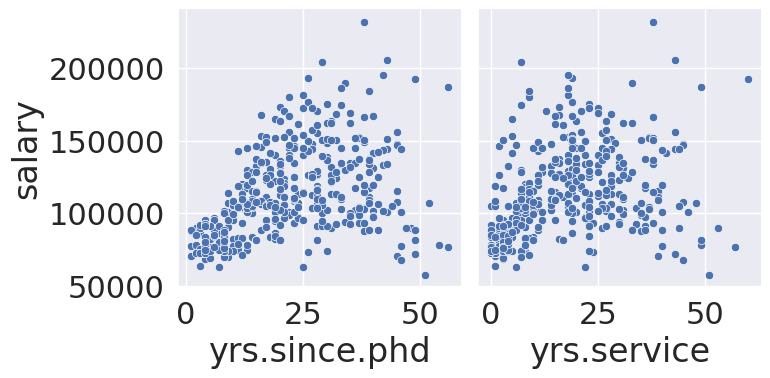

In [ ]:
sns.set(font_scale=2)
sns.pairplot(data=df,y_vars=['salary'],x_vars=['yrs.since.phd','yrs.service'],height=4) #looking for outliers visually

<ipython-input-27-5b8651118e43>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt='.2g',center=0,cmap='coolwarm',linewidths=1,linecolor='black')


<Axes: >

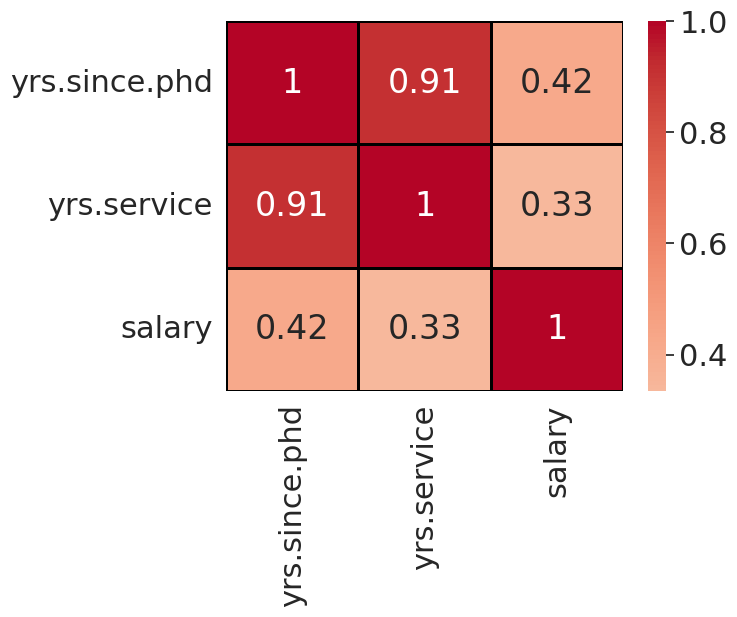

In [ ]:
sns.heatmap(df.corr(),annot=True,fmt='.2g',center=0,cmap='coolwarm',linewidths=1,linecolor='black')

In [ ]:
#Categotical variables
df['rank'].value_counts()
df.select_dtypes(include='object').value_counts()

rank       discipline  sex   
Prof       B           Male      125
           A           Male      123
AsstProf   B           Male       38
AssocProf  B           Male       32
           A           Male       22
AsstProf   A           Male       18
Prof       B           Female     10
           A           Female      8
AssocProf  B           Female      6
AsstProf   A           Female      6
           B           Female      5
AssocProf  A           Female      4
dtype: int64

In [ ]:
categorical=list(df.select_dtypes(include='object'))
for cat in categorical:
  print(df[cat].value_counts())



Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64
B    216
A    181
Name: discipline, dtype: int64
Male      358
Female     39
Name: sex, dtype: int64


In [ ]:
df=pd.get_dummies(data=df,drop_first=True)
df.head(2)

,yrs.since.phd,yrs.service,salary,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,18,139750,0,1,1,1
1,20,16,173200,0,1,1,1


In [ ]:
y=df.salary / 1000
X=df.drop(columns=['salary','yrs.service'])

In [ ]:
X=sm.add_constant(X)

In [ ]:
#TRaining/Test Set Split
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=1502)

In [ ]:
model=sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     56.20
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           1.65e-41
Time:                        17:18:22   Log-Likelihood:                -1424.2
No. Observations:                 317   AIC:                             2860.
Df Residuals:                     311   BIC:                             2883.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            79.6855      5.408     14.735

In [ ]:
predictions=model.predict(X_test)
predictions[:4]

364    118.590061
30     134.868270
378    118.731635
188     99.876615
dtype: float64

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(f"MAE: is {round(mean_absolute_error(y_test,predictions),1)} ")
RSE = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RSE is {round(RSE, 1)}")

MAE: is 18.2 
RSE is 25.8
